In [1]:
!pip install onnxruntime==1.13.1
# downloads ONNX model and example input from public github repo
!wget -O model_v1.onnx https://github.com/nixie/cloud-segmentation/blob/main/blobs/model_v1.onnx?raw=true
!wget -O example_tile_427_466-20_RGBN.npy https://github.com/nixie/cloud-segmentation/blob/main/blobs/example_tile_427_466-20_RGBN.npy?raw=true

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 4.1 MB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
--2023-01-03 02:02:32--  https://github.com/nixie/cloud-segmentation/blob/main/blobs/model_v1.onnx?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/nixie/cloud-segmentation/raw/main/blobs/model_v1.onnx [following]
--2023-01-03 02:02:32--  https://github.com/nixie/cloud-segmentation/raw/main/blobs/model_v1.onnx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nixie/cloud-segmentation/main/blobs/model_v1.onnx [following]
--2023-01-03 02:02:32--  https://raw.githubusercontent.c

In [2]:
# check size <250MB
!ls -lh model_v1.onnx

-rw-r--r-- 1 root root 52M Jan  2 23:29 model_v1.onnx


In [3]:
import numpy as np
import torch
import onnxruntime
from torchvision.utils import draw_segmentation_masks
import matplotlib.pyplot as plt

In [4]:
x = np.load('example_tile_427_466-20_RGBN.npy')
B,C,H,W = x.shape
x.shape

(1, 4, 224, 224)

In [5]:
ort_session = onnxruntime.InferenceSession("model_v1.onnx")
outputs = ort_session.run(None, {ort_session.get_inputs()[0].name: x})
output = outputs[0]
output.shape

(1, 224, 224)

In [6]:
assert set(np.unique(output).tolist()).issubset({0,1}), "Model output is not in domain {0,1}"
assert output.shape == (B,H,W), "Model output size mismatch"

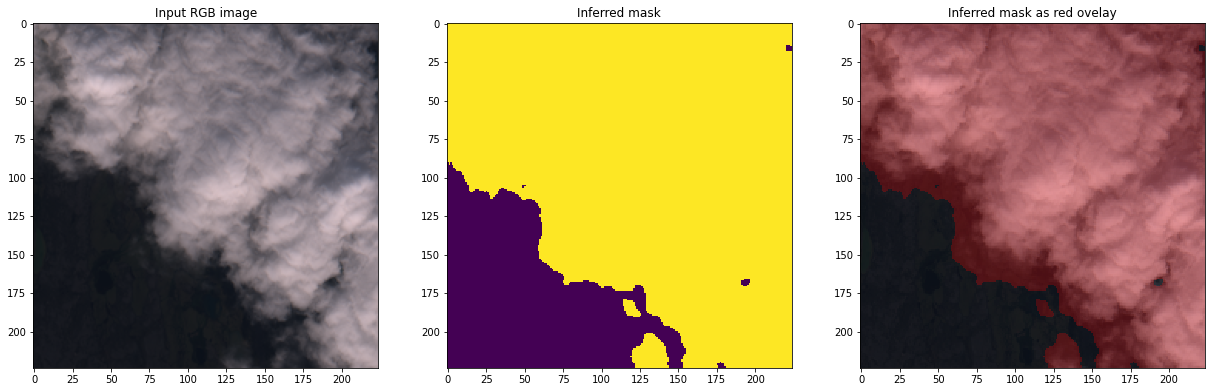

In [9]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=[21,7])
ax1.imshow(np.transpose(x[0,:3], [1,2,0]))
ax2.imshow(output[0], interpolation='none')

masked_x = draw_segmentation_masks(torch.from_numpy((x[0,:3]*255).astype('uint8')),
                                   torch.from_numpy(output[0]).bool(),
                                   colors=['red',],
                                   alpha=0.25)
ax3.imshow(np.transpose(masked_x, [1,2,0]), interpolation='none')

ax1.set_title('Input RGB image')
ax2.set_title('Inferred mask')
ax3.set_title('Inferred mask as red ovelay');